<a href="https://colab.research.google.com/github/RamyaDobbala/ExcelR-Solutions---NLP/blob/main/31_01_25_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Named Entity Recognition**

In [1]:
sent = "Ram is studying at MallaReddy University in Hyderabad, India"

In [2]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [3]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


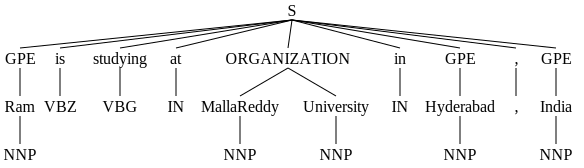

In [9]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
ne_chunk(nltk.pos_tag(word_tokenize(sent)), binary=False)

In [10]:
!pip install spacy

In [11]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Apple is ready to launch new phone worth $10000 in New york time square')
for ent in doc.ents:
  print(ent.text, ent.start_char, ent.end, ent.label_)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Apple 0 1 ORG
10000 42 10 MONEY
New york 51 13 GPE


**UseCase : Extracting Entities fron New Articles**

In [14]:
text = """
Elon Musk, the CEO of SpaceX and Tesla, announced that SpaceX Starship will be launching its first crewed mission to Mars in 2027.
The mission, which will involve astronauts from NASA, will be take place at the Kennerdy Space Center in Florida.
Musk emphasized that the project would push the boundaries of space exploration.
"""

In [15]:
doc = nlp(text)

for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: Elon Musk, Label: PERSON
Entity: SpaceX, Label: NORP
Entity: Tesla, Label: ORG
Entity: SpaceX Starship, Label: PERSON
Entity: first, Label: ORDINAL
Entity: Mars, Label: LOC
Entity: 2027, Label: DATE
Entity: NASA, Label: ORG
Entity: the Kennerdy Space Center, Label: ORG
Entity: Florida, Label: GPE


In [16]:
import pandas as pd
entities = [(ent.text,ent.label_,ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities,columns=['Text','Label','Lemma'])
print(df)

                        Text    Label                      Lemma
0                  Elon Musk   PERSON                  Elon Musk
1                     SpaceX     NORP                     SpaceX
2                      Tesla      ORG                      Tesla
3            SpaceX Starship   PERSON            SpaceX starship
4                      first  ORDINAL                      first
5                       Mars      LOC                       Mars
6                       2027     DATE                       2027
7                       NASA      ORG                       NASA
8  the Kennerdy Space Center      ORG  the Kennerdy Space Center
9                    Florida      GPE                    Florida
